Scaled Data:
    number of goals team1  number of goals team2  total attempts team1  \
0               0.000000                   0.50              0.130435   
1               0.857143                   0.50              0.478261   
2               0.000000                   0.50              0.521739   
3               0.142857                   0.25              0.173913   
4               0.142857                   0.50              0.521739   

   total attempts team2  conceded team1  conceded team2  \
0               0.18750            0.50        0.000000   
1               0.25000            0.50        0.857143   
2               0.28125            0.50        0.000000   
3               0.21875            0.25        0.142857   
4               0.09375            0.50        0.142857   

   goal inside the penalty area team1  goal inside the penalty area team2  \
0                            0.000000                                0.50   
1                            0.857143 

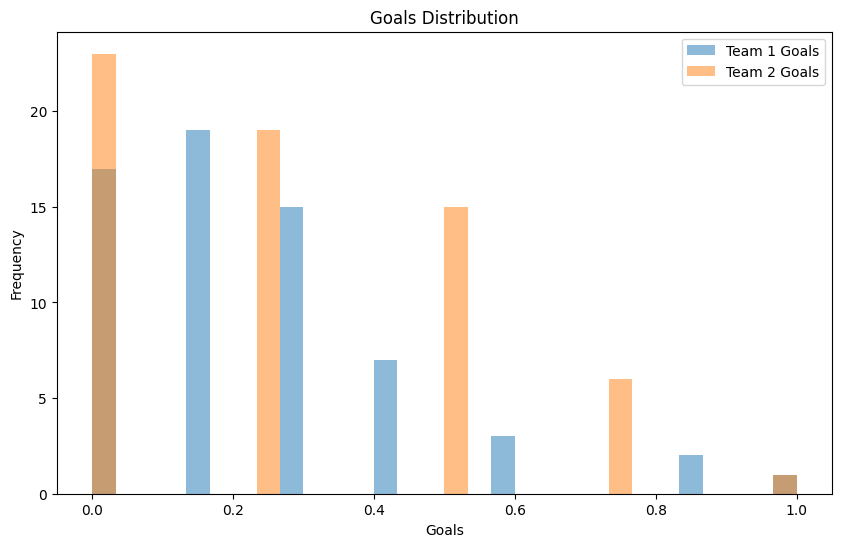

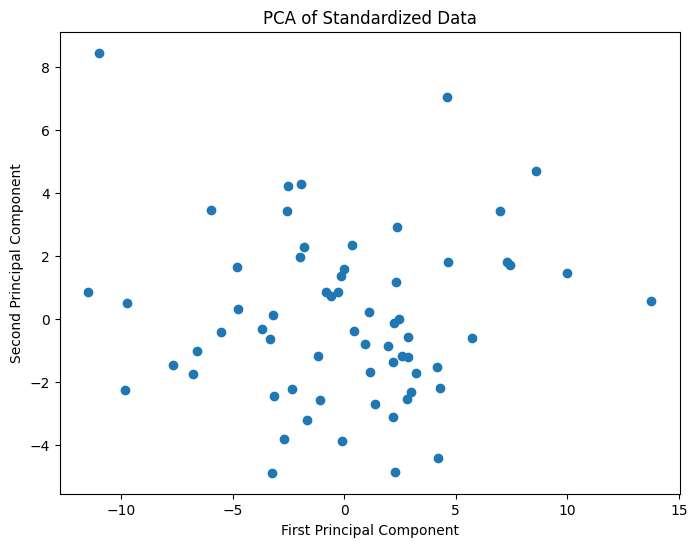

/kaggle/input/fifa-world-cup-2022-complete-dataset/Fifa_world_cup_matches.csv


In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

df= pd.read_csv("/kaggle/input/fifa-world-cup-2022-complete-dataset/Fifa_world_cup_matches.csv")

#returns first few rows to get quick snapshot of the dataset
print(df.head())
print(df.shape)
print(df.info())
print(df.describe())

Max_goals_team1= df.iloc[:,5].max()
Max_goals_team2= df.iloc[:,6].max()

print(Max_goals_team1)
print(Max_goals_team2)

#null check
print(df.isnull().sum())

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=[np.number])), columns=df.select_dtypes(include=[np.number]).columns)

# Analysis after Scaling
print("Scaled Data:\n", df_scaled.head())

# Data Visualization 
plt.figure(figsize=(10,6))
plt.hist(df_scaled['number of goals team1'], bins=30, alpha=0.5, label='Team 1 Goals')  
plt.hist(df_scaled['number of goals team2'], bins=30, alpha=0.5, label='Team 2 Goals') 
plt.title('Goals Distribution')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=[np.number])), columns=df.select_dtypes(include=[np.number]).columns)

# One-Hot Encoding for categorical variables
encoder = OneHotEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_columns]).toarray())

# Feature Engineering 
df['Total_Goals'] = df['number of goals team1'] + df['number of goals team2']

# Principal Component Analysis (PCA)
pca = PCA(n_components=2)  # Example: reducing to 2 components
df_pca = pd.DataFrame(pca.fit_transform(df_standardized))

# Data Imputation
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_standardized), columns=df_standardized.columns)

plt.figure(figsize=(8,6))
plt.scatter(df_pca[0], df_pca[1])
plt.title("PCA of Standardized Data")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session